In [37]:
'''
This projects aims to analyze crime patterns in San Francisco by examining the relationship between factors such as time, location, and incident type. 
All data was collected from the San Francisco Police Department's public records and is the collection of incident reports from 2018 to the present. This project will focus on violent 
crime as well as property crime in San Francisco.
After cleaning and formatting as well as some short EDA on the data I will also build a Tableau Dashboard to summarize any findings.
'''

'''

Data pulled from https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-2018-to-Present/wg3w-h783/about_data

Here is a brief overview of the dataset:

- The dataset contains incident reports from the San Francisco Police Department from 2018 to the present, non-violent crime, violent crime, property crime, etc.
- It includes various features such as incident type, location, time, and more.
- The focus will be on analyzing violent and property crimes.

Codebook:


| Field Name        | Data Type   | Description                                                                 |
|-------------------|-------------|-----------------------------------------------------------------------------|
| RowID             | String      | Unique row identifier for the dataset.                                      |
| IncidentDatetime  | DateTime    | Date and time when the incident occurred.                                   |
| IncidentDate      | Date        | Date (YYYY-MM-DD) of the incident.                                          |
| IncidentTime      | Time        | Time (HH:MM) when the incident occurred.                                    |
| IncidentYear      | Integer     | Year of the incident (e.g., 2019).                                          |
| IncidentDayOfWeek | String      | Day of the week of the incident (e.g., Monday, Tuesday).                    |
| ReportDatetime    | DateTime    | Date and time the incident was reported.                                    |
| IncidentID        | String      | Unique identifier for the incident.                                         |
| IncidentNumber    | String      | Case number assigned by SFPD.                                               |
| CADNumber         | String      | Computer Aided Dispatch (CAD) identifier, if applicable.                    |
| ReportTypeCode    | String      | Code representing the type of police report.                                |
| ReportTypeDescription | String  | Description of the report type (e.g., "Initial", "Supplemental").           |
| FiledOnline       | Boolean     | Indicates whether the report was filed online (TRUE/FALSE).                 |
| IncidentCode      | String      | Numeric code assigned to the type of incident.                              |
| IncidentCategory  | String      | Broad category of the incident (e.g., Larceny/Theft, Assault, Robbery).     |
| IncidentSubcategory | String    | Subcategory of the incident (e.g., Petty Theft, Aggravated Assault).        |
| IncidentDescription | String    | Narrative description of the incident.                                      |
| Resolution        | String      | Outcome of the incident (e.g., Arrest Made, Unfounded).                     |
| Intersection      | String      | Closest street intersection to the incident.                                |
| CNN               | String      | Census Neighborhood Number for geographic reference.                        |
| PoliceDistrict    | String      | Police district handling the incident (e.g., Southern, Mission).            |
| AnalysisNeighborhood | String   | Name of the neighborhood where the incident occurred.                       |
| SupervisorDistrict | Integer    | Supervisor district (Board of Supervisors jurisdiction).                    |
| Latitude          | Float       | Latitude coordinate of the incident location.                               |
| Longitude         | Float       | Longitude coordinate of the incident location.                              |
| Point             | Geometry    | Combined geographic point (Latitude, Longitude).                            |
| data_as_of        | String      | Date when the data was last updated.                                        |
| data_loaded_at    | String      | Timestamp the data was uploaded to the open data portal.                    |

'''
## Loading Neccessary Libraries

import pandas as pd
import matplotlib.pyplot as plt

## loading csv file

## Data download on Saturday, August 16, 2025, 3:22:21 PM

df = pd.read_csv("Police_Department_Incident_Reports__2018_to_Present_20250816.csv")

## See attached codebook for description of each column.


C:\Users\Ljsaa\AppData\Local\Temp\ipykernel_29664\1181934140.py:62: DtypeWarning: Columns (18,21,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Police_Department_Incident_Reports__2018_to_Present_20250816.csv")


In [38]:
'''
We begin with some data cleaning as this data is very large and contains many columns that may not be useful for our analysis. Reductions in dimensionality will help better represent the data 
and improve the performance of our analysis when we move our data into tableau.
'''

## We first view the structure of our data and identify any columns that can be removed in order to reduce dimensionality

pd.set_option('display.max_columns', None)

df.head()

,Row ID,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Incident ID,Incident Number,CAD Number,Report Type Code,Report Type Description,Filed Online,Incident Code,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Supervisor District 2012,Latitude,Longitude,Point,data_as_of,data_loaded_at,Neighborhoods,ESNCAG - Boundary File,Central Market/Tenderloin Boundary Polygon - Updated,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Invest In Neighborhoods (IIN) Areas,Current Supervisor Districts,Current Police Districts
0,139275426030,2024/05/23 08:58:00 AM,2024/05/23,08:58,2024,Thursday,2024/05/23 09:08:00 AM,1392754,240322949,241440743.0,II,Initial,NaN,26030,Arson,Arson,Arson,Open or Active,17TH ST \ UTAH ST,24017000.0,Mission,Mission,10.0,10.0,37.764549,-122.406425,POINT (-122.406425476 37.764549255),2025/06/12 10:07:02 AM,2025/06/13 09:52:57 AM,54.0,NaN,NaN,NaN,2.0,NaN,9.0,3.0
1,76059904134,2019/01/18 09:25:00 AM,2019/01/18,09:25,2019,Friday,2019/01/18 10:42:00 AM,760599,190043203,190181332.0,II,Initial,NaN,4134,Assault,Simple Assault,Battery,Open or Active,06TH ST \ BRYANT ST,23897000.0,Southern,South of Market,6.0,6.0,37.776039,-122.402527,POINT (-122.402526855 37.776039124),2025/06/12 10:07:02 AM,2025/06/13 09:52:57 AM,32.0,NaN,NaN,NaN,NaN,NaN,10.0,1.0
2,77207504134,2019/02/20 11:40:00 AM,2019/02/20,11:40,2019,Wednesday,2019/02/20 01:51:00 PM,772075,190127653,190512164.0,II,Initial,NaN,4134,Assault,Simple Assault,Battery,Open or Active,20TH ST \ FOLSOM ST,24122000.0,Mission,Mission,9.0,9.0,37.758896,-122.414688,POINT (-122.41468811 37.758895874),2025/06/12 10:07:02 AM,2025/06/13 09:52:57 AM,53.0,NaN,NaN,NaN,3.0,NaN,2.0,3.0
3,83296309027,2019/08/10 05:05:00 PM,2019/08/10,17:05,2019,Saturday,2019/08/10 05:08:00 PM,832963,190586764,192223042.0,II,Initial,NaN,9027,Fraud,Fraud,False Personation,Cite or Arrest Adult,16TH ST \ WIESE ST,24180000.0,Mission,Mission,9.0,9.0,37.765003,-122.420479,POINT (-122.420478821 37.765003204),2025/06/12 10:07:02 AM,2025/06/13 09:52:57 AM,53.0,NaN,NaN,NaN,3.0,NaN,2.0,3.0
4,85420604134,2019/10/03 09:33:00 PM,2019/10/03,21:33,2019,Thursday,2019/10/03 09:33:00 PM,854206,190744348,192764124.0,II,Initial,NaN,4134,Assault,Simple Assault,Battery,Cite or Arrest Adult,06TH AVE \ IRVING ST,27084000.0,Park,Inner Sunset,7.0,5.0,37.764179,-122.463104,POINT (-122.463104248 37.76417923),2025/06/12 10:07:02 AM,2025/06/13 09:52:57 AM,109.0,NaN,NaN,NaN,NaN,NaN,11.0,7.0


In [39]:
## Checking data dimensionality

df.shape

(959734, 37)

In [40]:
## We have 37 columns in total and almost 1 million reported crimes. It would be faster to name all the ones that we will keep, the ones removed are to be considered
## irrelevant for our analysis and are dropped.

## It is sufficient to identify each incident uniquely using it's index, so any unique identifiers like Incident ID can be dropped. Incident Category is sufficient for our analysis, any other columns like
## Incident Code and Sub-Category can be dropped. Columns 27-36 can be dropped as they are supplementary and not useful to us. We keep Longitude and Latitude values to be used later in Tableau for maps.
## All time data is useful so we keep those. Analysis Neighborhood is needed to location analysis so we keep it, any other neighborhood data such as intersection can be dropped. Resolution will be a
## a useful column as it indicates whether a case was resolved or not which will be useful for calculating resolution rates. It also includes information on unfounded cases, which would refer to cases
## where it is discovered that a crime did not actually occur.
## Below are the selected columns that are relevant for our analysis

cols = ['Incident Date', 'Incident Time',
       'Incident Year', 'Incident Day of Week',
        'Incident Code',
       'Incident Category',
       'Resolution',
       'Analysis Neighborhood', 'Latitude', 'Longitude']
      

df = df[cols]

In [41]:
## now we want to reduce the dataset to only include crimes that are relevant for our analysis. This includes violent crime such as homicide, assault, and robbery, as well as 
## property crime such as burglary and theft.

df['Incident Category'].unique()

array(['Arson', 'Assault', 'Fraud', 'Other Miscellaneous', 'Non-Criminal',
       'Malicious Mischief', 'Robbery', 'Fire Report', 'Lost Property',
       'Missing Person', 'Other', 'Vandalism', 'Civil Sidewalks',
       'Warrant', 'Other Offenses', 'Suspicious Occ', 'Case Closure',
       'Homicide', nan, 'Disorderly Conduct', 'Drug Offense',
       'Larceny Theft', 'Suicide', 'Gambling', 'Burglary', 'Rape',
       'Courtesy Report', 'Motor Vehicle Theft', 'Recovered Vehicle',
       'Stolen Property', 'Weapons Offense',
       'Miscellaneous Investigation',
       'Offences Against The Family And Children', 'Weapons Carrying Etc',
       'Drug Violation', 'Traffic Collision',
       'Forgery And Counterfeiting', 'Traffic Violation Arrest',
       'Sex Offense', 'Embezzlement', 'Prostitution',
       'Motor Vehicle Theft?', 'Vehicle Impounded', 'Vehicle Misplaced',
       'Suspicious', 'Liquor Laws',
       'Human Trafficking, Commercial Sex Acts', 'Weapons Offence',
       'Human Traf

In [42]:
## Viewing the incident data shows that most non-criminal entries are made for returned property, turned in firearms, open case aids, etc. These observations are not supplemental and can be dropped

df = df[df['Incident Category'] != 'Non-Criminal']

df

,Incident Date,Incident Time,Incident Year,Incident Day of Week,Incident Code,Incident Category,Resolution,Analysis Neighborhood,Latitude,Longitude
0,2024/05/23,08:58,2024,Thursday,26030,Arson,Open or Active,Mission,37.764549,-122.406425
1,2019/01/18,09:25,2019,Friday,4134,Assault,Open or Active,South of Market,37.776039,-122.402527
2,2019/02/20,11:40,2019,Wednesday,4134,Assault,Open or Active,Mission,37.758896,-122.414688
3,2019/08/10,17:05,2019,Saturday,9027,Fraud,Cite or Arrest Adult,Mission,37.765003,-122.420479
4,2019/10/03,21:33,2019,Thursday,4134,Assault,Cite or Arrest Adult,Inner Sunset,37.764179,-122.463104
...,...,...,...,...,...,...,...,...,...,...
959729,2025/08/15,19:21,2025,Friday,65010,Traffic Violation Arrest,Cite or Arrest Adult,South of Market,37.779213,-122.410934
959730,2025/08/14,23:55,2025,Thursday,6372,Larceny Theft,Cite or Arrest Adult,Outer Mission,37.719124,-122.439827
959731,2025/07/27,03:26,2025,Sunday,5052,Burglary,Open or Active,Noe Valley,37.746895,-122.426971
959732,2025/08/14,13:00,2025,Thursday,3074,Robbery,Open or Active,Mission Bay,37.776333,-122.394035


In [43]:
## Viewing the incident categories we see that there are also many crimes that can be combined into one incident category, given that they would refer to the same type of crime, they do not have to be exact
## matches of one another. We also identify categories which can be dropped since they would not contribute to our analysis on violent crime.

## nan can be dropped, 'Other' and 'Other Offenses' can also be dropped, Civil Sidewalks is another category that does not refer to some serious crime, other categories similar to this one can
## also be dropped. In general I am only including crimes that include some victim and a perpetrator, this means that missing persons reports and suicides or self harm reports will not be included
## Traffic Violations can also be excluded since they are not serious crimes. Suspicious persons reports can also be excluded, since they do not involve a clear victim or perpetrator.
## Lastly Disorderly Conduct can be dropped since they are also not serious crimes and usually involve minor public disturbances with no serious implications

# Filtering crimes to relevant list


df = df[df['Incident Category'] != 'Non-Criminal']

filtered_crimes = ['Arson', 'Assault', 'Fraud',
       'Malicious Mischief', 'Robbery', 'Vandalism',
       'Homicide', 'Drug Offense',
       'Larceny Theft', 'Burglary', 'Rape',
       'Motor Vehicle Theft',
       'Stolen Property', 'Weapons Offense',
       'Offences Against The Family And Children', 'Weapons Carrying Etc',
       'Drug Violation',
       'Forgery And Counterfeiting',
       'Sex Offense', 'Embezzlement', 'Prostitution',
       'Human Trafficking, Commercial Sex Acts', 'Weapons Offence',
       'Human Trafficking (A), Commercial Sex Acts',
       'Human Trafficking (B), Involuntary Servitude']

df = df[df['Incident Category'].isin(filtered_crimes)]

## Human Trafficking can be grouped , as there are 3 incident categories but would all refer to the same general incident category.
# Now we want to standardize each human trafficking report to simply say Human Trafficking. The same follows for weapons offenses and mischief/vandalism and drug offenses
## We can also group financial crimes into one category, though it is important to note that fraud makes up a majority of these cases.

df['Incident Category'] = df['Incident Category'].replace(['Human Trafficking, Commercial Sex Acts',
       'Human Trafficking (A), Commercial Sex Acts',
       'Human Trafficking (B), Involuntary Servitude'], 'Human Trafficking')

df['Incident Category'] = df['Incident Category'].replace(['Weapons Offense', 'Weapons Carrying Etc', 'Weapons Offence'], 'Weapons Offense')

df['Incident Category'] = df['Incident Category'].replace(['Malicious Mischief'], 'Vandalism')

df['Incident Category'] = df['Incident Category'].replace(['Drug Violation'], 'Drug Offense')

df['Incident Category'] = df['Incident Category'].replace(['Fraud', 'Embezzlement', 'Forgery And Counterfeiting'], 'Financial Crime')

## We may also want to rename some Incident Categories to be shorter as they will appear much nicer on our graphs

df['Incident Category'] = df['Incident Category'].replace(['Offences Against The Family And Children'], 'Domestic Abuse')

df['Incident Category'] = df['Incident Category'].replace(['Motor Vehicle Theft'], 'Vehicle Theft')

## We can also rename Analysis Neighborhood to just 'Neighborhood'

df = df.rename(columns={'Analysis Neighborhood': 'Neighborhood'})


In [44]:
df.shape

(644755, 10)

In [45]:
## Lastly we would like to remove any rows where the resolution is unfounded, this will allow us to view cases that are either still open or resolved since in the case where a case is unfounded
## it is discovered that a crime did not actually occur which would not be useful for our analysis and could even cause some misrepresentation

df = df[df['Resolution'] != 'Unfounded']

In [46]:
# now that we filtered the data, we can check the info to understand the structure and data types for each column, and also check for any missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 643695 entries, 0 to 959733
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Incident Date         643695 non-null  object 
 1   Incident Time         643695 non-null  object 
 2   Incident Year         643695 non-null  int64  
 3   Incident Day of Week  643695 non-null  object 
 4   Incident Code         643695 non-null  int64  
 5   Incident Category     643695 non-null  object 
 6   Resolution            643695 non-null  object 
 7   Neighborhood          611489 non-null  object 
 8   Latitude              611673 non-null  float64
 9   Longitude             611673 non-null  float64
dtypes: float64(2), int64(2), object(6)
memory usage: 54.0+ MB


In [47]:
## We see that there are a few rows that are missing locations values, specifically in the 'Analysis Neighborhood' column, as well as in Longitude and Latitudde. Without viewing the data
## I can guess that this is more than likey from incident reports where the location was not properly recorded usually when the victim or person reporting it is unsure of where the incident occurred.
## We can explore this further by looking at a few rows where Analysis Neighborhood is Missing

df[df['Neighborhood'].isnull()]

,Incident Date,Incident Time,Incident Year,Incident Day of Week,Incident Code,Incident Category,Resolution,Neighborhood,Latitude,Longitude
273,2018/07/25,21:00,2018,Wednesday,4011,Assault,Open or Active,NaN,37.708313,-122.420082
609,2019/02/24,23:15,2019,Sunday,6244,Larceny Theft,Open or Active,NaN,NaN,NaN
1051,2024/09/06,00:06,2024,Friday,4134,Assault,Open or Active,NaN,37.708313,-122.420082
1394,2021/07/22,20:07,2021,Thursday,6374,Larceny Theft,Open or Active,NaN,37.708313,-122.420082
1509,2022/01/23,15:45,2022,Sunday,3074,Robbery,Open or Active,NaN,37.708313,-122.420082
...,...,...,...,...,...,...,...,...,...,...
959370,2025/07/15,10:00,2025,Tuesday,6374,Larceny Theft,Open or Active,NaN,NaN,NaN
959374,2025/08/12,12:10,2025,Tuesday,6374,Larceny Theft,Open or Active,NaN,NaN,NaN
959445,2025/08/06,05:35,2025,Wednesday,6372,Larceny Theft,Open or Active,NaN,NaN,NaN
959551,2025/08/05,16:35,2025,Tuesday,6372,Larceny Theft,Open or Active,NaN,NaN,NaN


In [48]:
## Viewing this output we see that most most rows where Analysis Neighborhood is missing are from reports filed online using the coplogic system. Though we are missing the data for some incidents,
## we can still proceed with our analysis, since these are still reported crimes. The only problem is that we won't be able to analyze the data by neighborhood for these incidents. For those sections
## we can drop them, but for now we will keep them in our dataset.

## Now that we cleaned our data we can begin to convert the data types into proper formats for analysis

## We want Incident time to be a discrete integer value from 0-23, which corresponds to a 24-hour clock format. This is so we can later analyze crime patterns throughout the day.
## We do this using string splicing

df['Incident Time'] = df['Incident Time'].str.split(':').str[0].astype(int)

df['Incident Time']

0          8
1          9
2         11
3         17
4         21
          ..
959725     9
959730    23
959731     3
959732    13
959733    22
Name: Incident Time, Length: 643695, dtype: int64

In [49]:
## Next we add a new column for the month in which an incident occurred, this can help us visualize monthly and seasonal trends in crime later. We also use string splicing to accomplish this
## Note that Incident Date is in YYYY/MM/DD format

df['Incident Month'] = df['Incident Date'].str.split('/').str[1].astype(int)

In [50]:
df['Incident Month']

0          5
1          1
2          2
3          8
4         10
          ..
959725     8
959730     8
959731     7
959732     8
959733     8
Name: Incident Month, Length: 643695, dtype: int64

In [51]:
## Now that we have cleaned and formatted our data, we can reset our index so we can write this DataFrame to a new CSV file

df = df.reset_index(drop=True)

df


,Incident Date,Incident Time,Incident Year,Incident Day of Week,Incident Code,Incident Category,Resolution,Neighborhood,Latitude,Longitude,Incident Month
0,2024/05/23,8,2024,Thursday,26030,Arson,Open or Active,Mission,37.764549,-122.406425,5
1,2019/01/18,9,2019,Friday,4134,Assault,Open or Active,South of Market,37.776039,-122.402527,1
2,2019/02/20,11,2019,Wednesday,4134,Assault,Open or Active,Mission,37.758896,-122.414688,2
3,2019/08/10,17,2019,Saturday,9027,Financial Crime,Cite or Arrest Adult,Mission,37.765003,-122.420479,8
4,2019/10/03,21,2019,Thursday,4134,Assault,Cite or Arrest Adult,Inner Sunset,37.764179,-122.463104,10
...,...,...,...,...,...,...,...,...,...,...,...
643690,2025/08/12,9,2025,Tuesday,6304,Larceny Theft,Open or Active,Mission,37.771008,-122.419647,8
643691,2025/08/14,23,2025,Thursday,6372,Larceny Theft,Cite or Arrest Adult,Outer Mission,37.719124,-122.439827,8
643692,2025/07/27,3,2025,Sunday,5052,Burglary,Open or Active,Noe Valley,37.746895,-122.426971,7
643693,2025/08/14,13,2025,Thursday,3074,Robbery,Open or Active,Mission Bay,37.776333,-122.394035,8


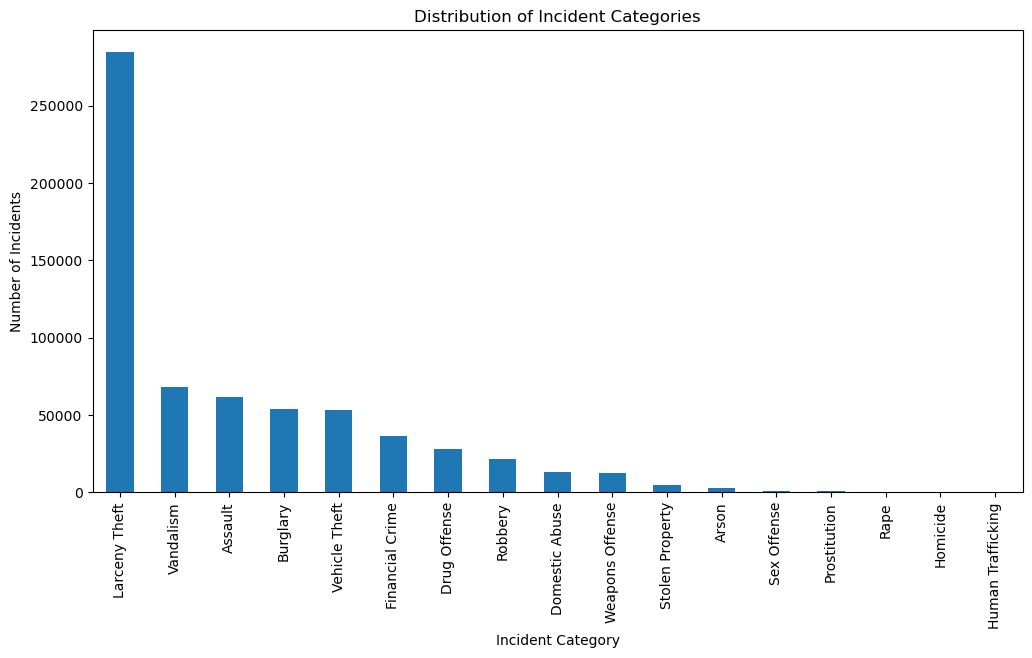

In [52]:
'''
Now that our data is cleaned and formatted, we can begin analyzing it for insights.
We first look at overall crime statistics, things like total incidents, frequency of incidents by category, etc.
We will then look at some temporal trends, such as how crime rates vary by month or day of the week.
Lastly we can examine the geographic distribution of incidents, looking at which neighborhoods are most affected by crime and which crimes occur where.
'''


## Now we make a bar chart showing the distribution of incident categories

plt.figure(figsize=(12,6))
df['Incident Category'].value_counts().plot(kind='bar')
plt.title('Distribution of Incident Categories')
plt.xlabel('Incident Category')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=90)
plt.show()


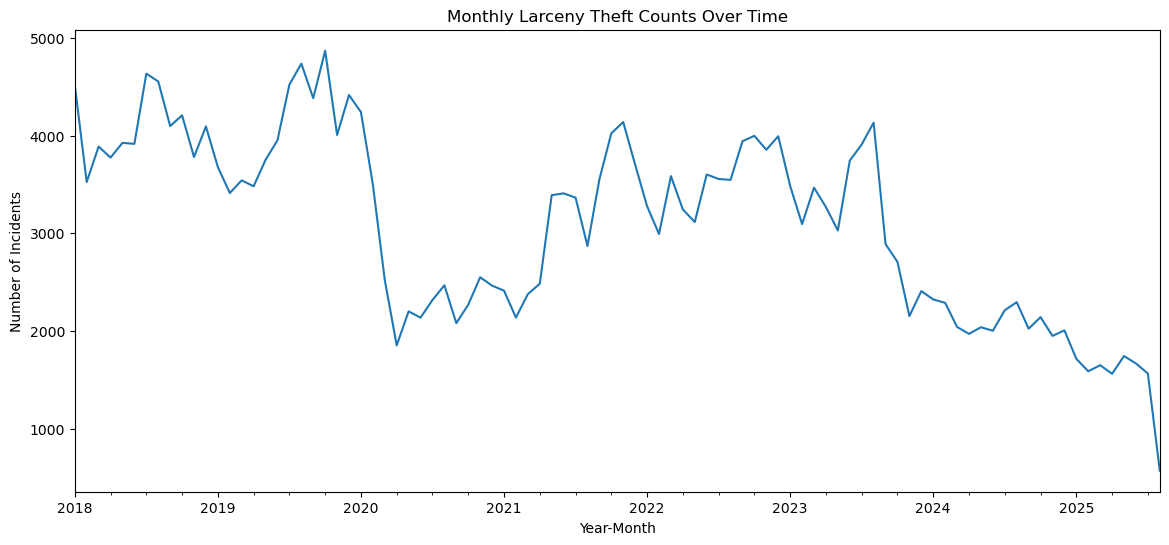

In [53]:
## Viewing this graph we see that by far Larceny Theft is the most common incident type. San Francisco in recent years has made headlines for its high rate of car break ins. 
## Car break ins which result in the loss of property fall under this category of Larceny Theft, which would explain the high number of incidents.

## We can view the trend over time by looking at the number of incidents per month for the data beginning in 2018

## to do this we will need to make a new column which shows the year-month of an incident, we first make a new dataset which only includes larceny theft

# Filter for Larceny Theft incidents and create a copy
larceny_df = df[df['Incident Category'] == 'Larceny Theft'].copy()

# Convert 'Incident Date' to datetime
larceny_df['Incident Date'] = pd.to_datetime(larceny_df['Incident Date'])

# Create a 'Year-Month' column
larceny_df['YearMonth'] = larceny_df['Incident Date'].dt.to_period('M')

# Group by 'YearMonth' and count incidents
monthly_counts = larceny_df.groupby('YearMonth').size()

# Plot the line graph
monthly_counts.plot(kind='line', figsize=(14,6))
plt.title('Monthly Larceny Theft Counts Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Incidents')
plt.show()


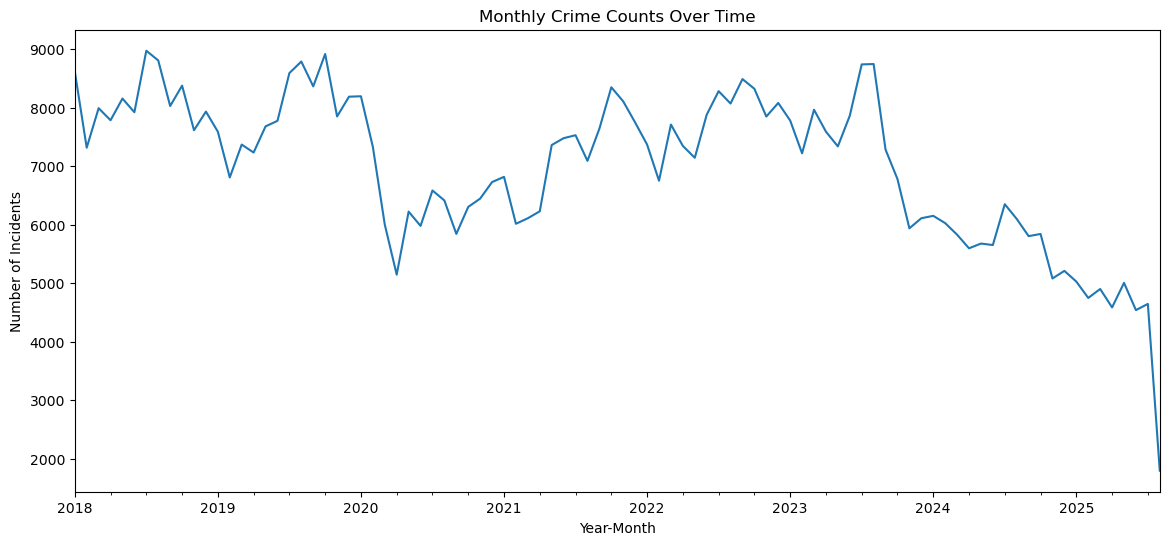

In [54]:
## As with most time analysis now, we see significant drops around the 2020 pandemic. less people moving around means less cars with valuables in them. We do see that larceny thefts did slowly
## increase following the initial lockdowns, peaking around the 3rd quarter of 2023, bt have been steadily decreasing since then. This maybe due to new laws making the punishment for theft more severe.

## Let's pivot back to the overall crime trends. Lets now look at monthly crime trends without filtering for larceny theft.

df['Incident Date'] = pd.to_datetime(df['Incident Date'])

# Create a 'Year-Month' column
df['YearMonth'] = df['Incident Date'].dt.to_period('M')

# Group by 'YearMonth' and count incidents
monthly_counts = df.groupby('YearMonth').size()

# Plot the line graph
monthly_counts.plot(kind='line', figsize=(14,6))
plt.title('Monthly Crime Counts Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Incidents')
plt.show()


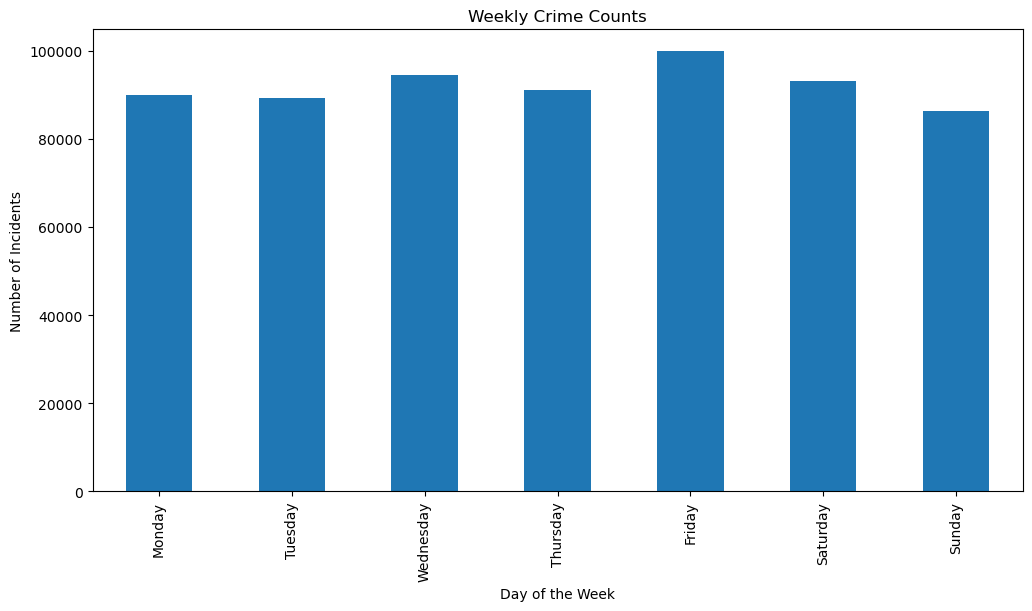

In [55]:
## Given that Larceny Theft makes up a significant portion of the data, it makes sense that including all other still gives us a similar shape.

## Now we look at crime trends during days of the week

# Group by 'DayOfWeek' and count incidents
weekly_counts = df.groupby('Incident Day of Week').size()

# Reorder the index to have days in the correct order
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_counts = weekly_counts.reindex(days_order)

# Plot the bar chart
weekly_counts.plot(kind='bar', figsize=(12,6))
plt.title('Weekly Crime Counts')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Incidents')
plt.show()


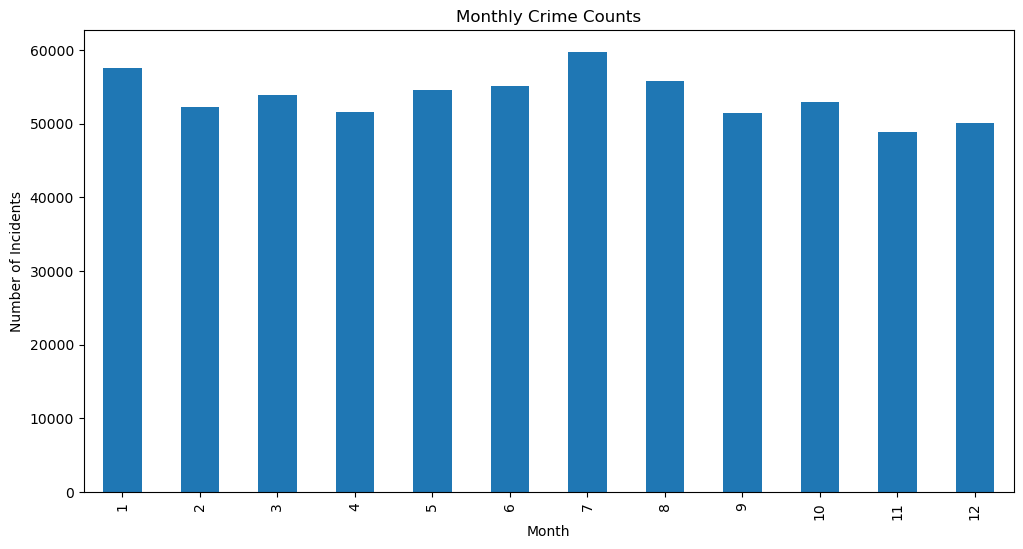

In [56]:
## We see very slight increases in overall crime in the Friday to Sunday period, which aligns with common trends in urban crime dynamics. Though the increases are not very pronounced

## We can also check crime frequency by month
monthly_counts = df.groupby('Incident Month').size()

# Plot the bar chart
monthly_counts.plot(kind='bar', figsize=(12,6))
plt.title('Monthly Crime Counts')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.show()

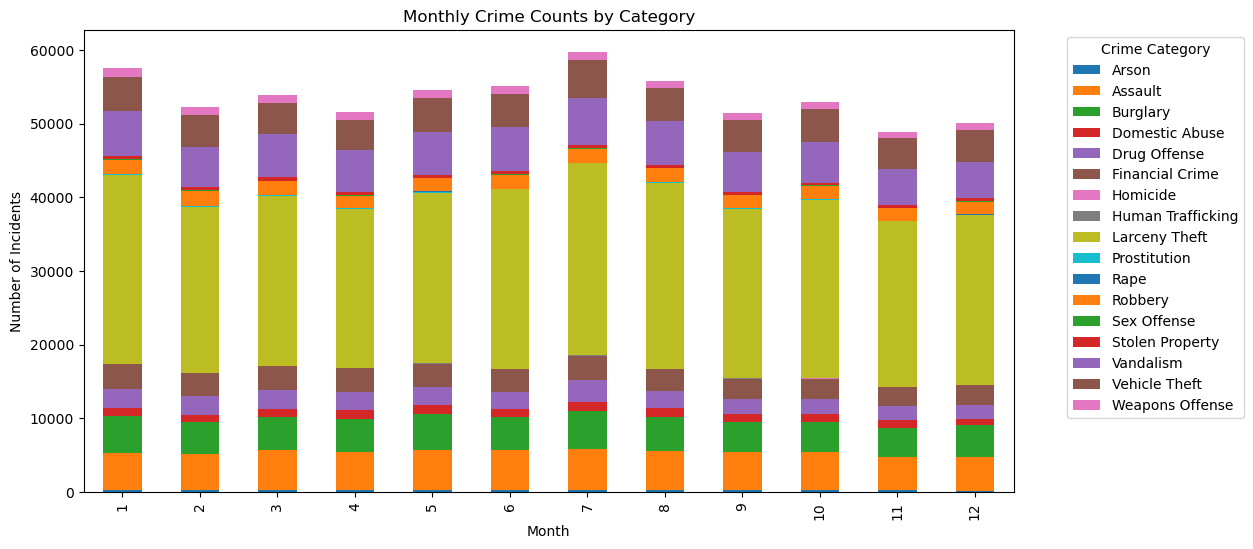

In [57]:
## We see that July and January have the highest crime counts with the spring and fall seasons seem to have a lower frequency of incidents.
## This could be due to a higher presence of tourists and more activities during the summer and winter seasons

## Lets change this to a stacked bar chart, showing the distribution of crimes for every month.

monthly_counts = df.groupby(['Incident Month', 'Incident Category']).size().unstack()
monthly_counts.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Monthly Crime Counts by Category')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.legend(title='Crime Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

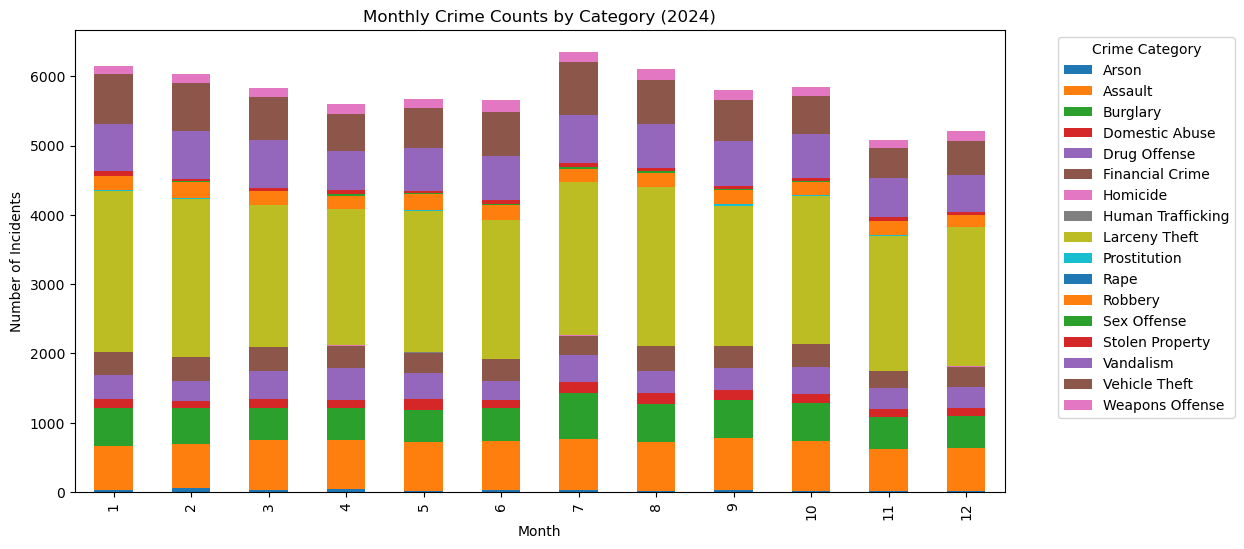

In [58]:
## Lets do the same thing but now only for crimes in the year 2024

monthly_counts_2024 = df[df['Incident Year'] == 2024].groupby(['Incident Month', 'Incident Category']).size().unstack()
monthly_counts_2024.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Monthly Crime Counts by Category (2024)')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.legend(title='Crime Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


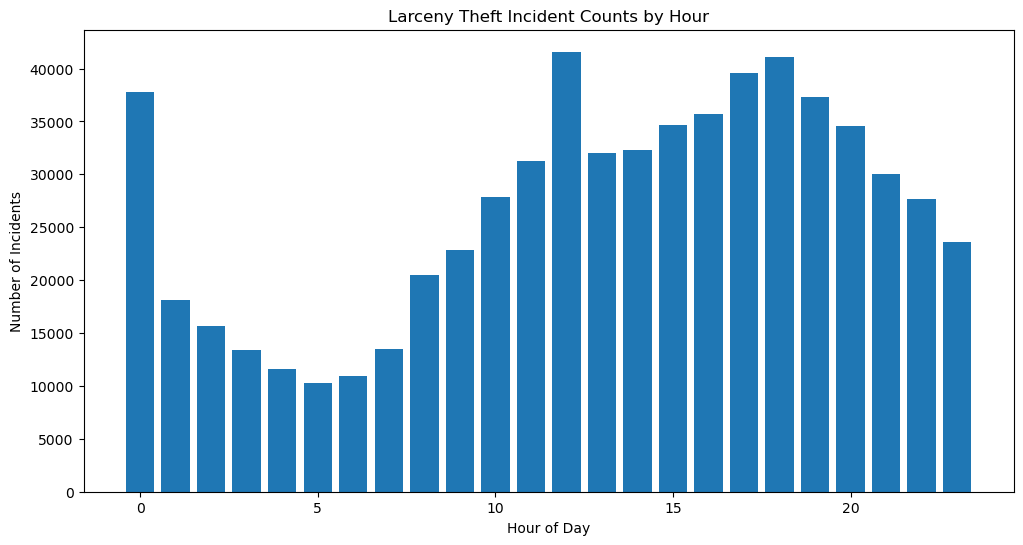

In [59]:
## Lets view Incident Counts by Hour

incident_hour = df.groupby('Incident Time').size()

plt.figure(figsize=(12, 6))
plt.bar(incident_hour.index, incident_hour.values)
plt.title('Larceny Theft Incident Counts by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Incidents')
plt.show()

In [60]:
## We see that most crime incidents occur during the late afternoon and early evening, though the peak at 12 pm and 12 am may be due to victims reporting incidents 
## around 12pm/am if they are unsure about the exact time. We see that there is a significant drop in incidents during the late night hours, which makes sense given the lower 
## levels of activity during those times

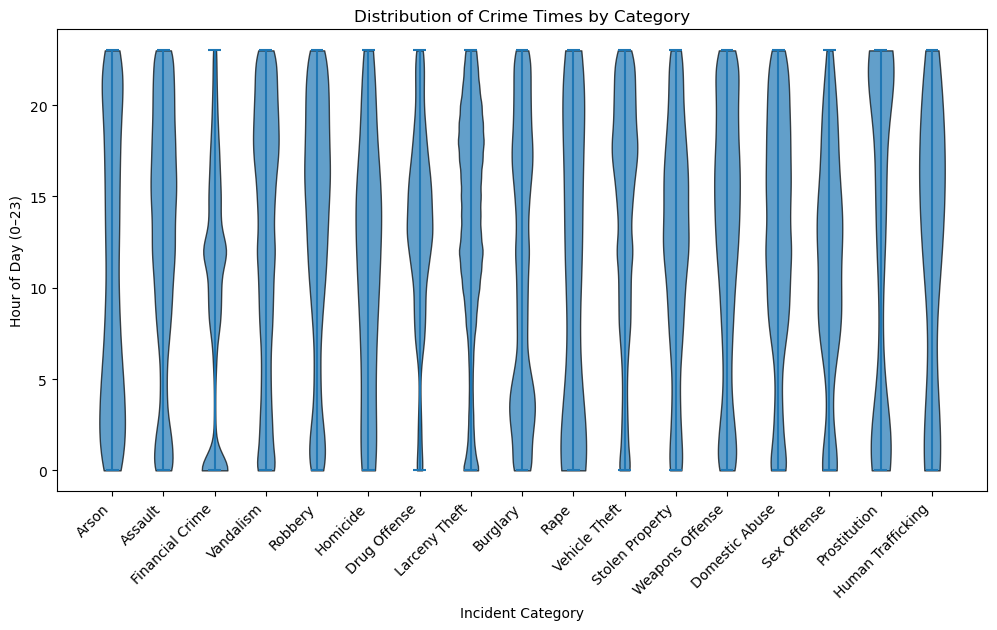

In [61]:
## Lastly lets look at incident categories and how they are spread out throughout the day to see if any patterns emerge. We can do this using a boxplot, with each boxplot 
## representing a different incident category.

categories = df['Incident Category'].unique()
data = [df.loc[df['Incident Category'] == cat, 'Incident Time'] for cat in categories]

plt.figure(figsize=(12,6))
parts = plt.violinplot(data, vert=True, showmeans=False)

plt.xticks(range(1, len(categories)+1), categories, rotation=45, ha="right")
plt.xlabel("Incident Category")
plt.ylabel("Hour of Day (0–23)")
plt.title("Distribution of Crime Times by Category")
for body in parts['bodies']:
    body.set_facecolor('#1f77b4')  
    body.set_edgecolor('black')  
    body.set_alpha(0.7)   

plt.show()

In [62]:
## Looking at this graph we see that most crimes occur in the daylight hours, most have little reports in the early morning hours. For example financial crime has almost no
## cases in the early morning, this can be since most stores are closed at this time, and the financial crimes category includes many cases of counterfeit money etc. Burglary, Rape, and Arson, on the
## other hand, seem to occur more in the early morning hours.

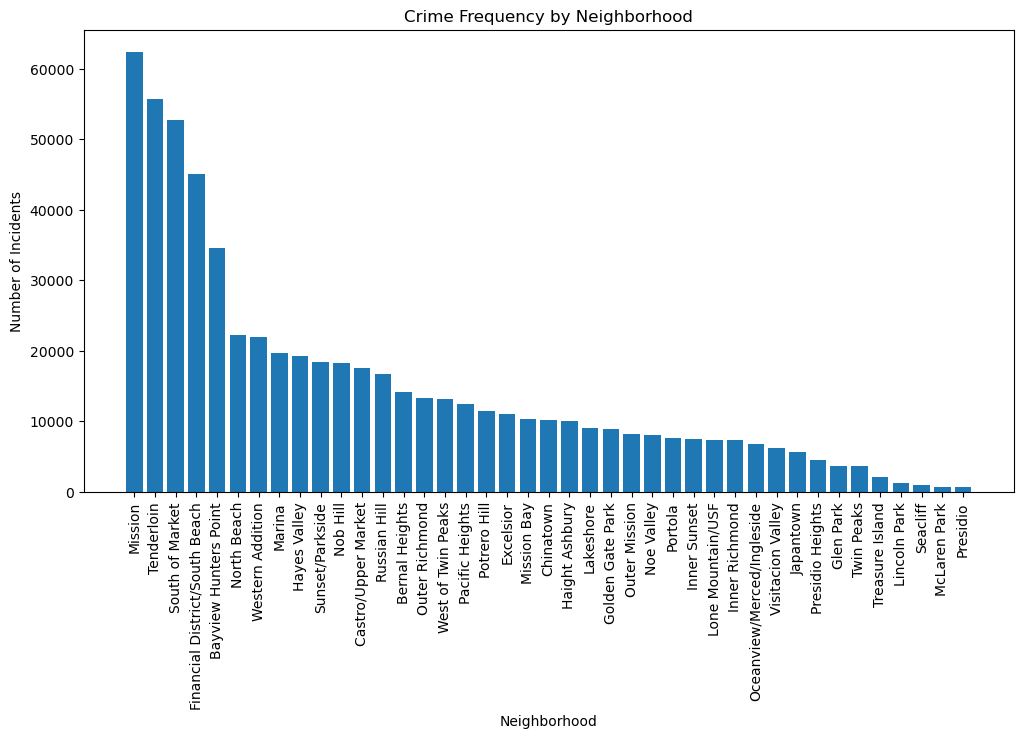

In [63]:
''' 
Now we can begin to look at neighborhood crime trends. We first look at the most affected neighborhoods for crime in general.
Then given the high amount of Larceny Theft, we can check to see if there are specific neighborhoods that are more affected by this type of crime.
'''

## Graph for crime frequency by neighborhood

neighborhood_crime = df['Neighborhood'].value_counts()

plt.figure(figsize=(12, 6))
plt.bar(neighborhood_crime.index, neighborhood_crime.values)
plt.title('Crime Frequency by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=90)
plt.show()

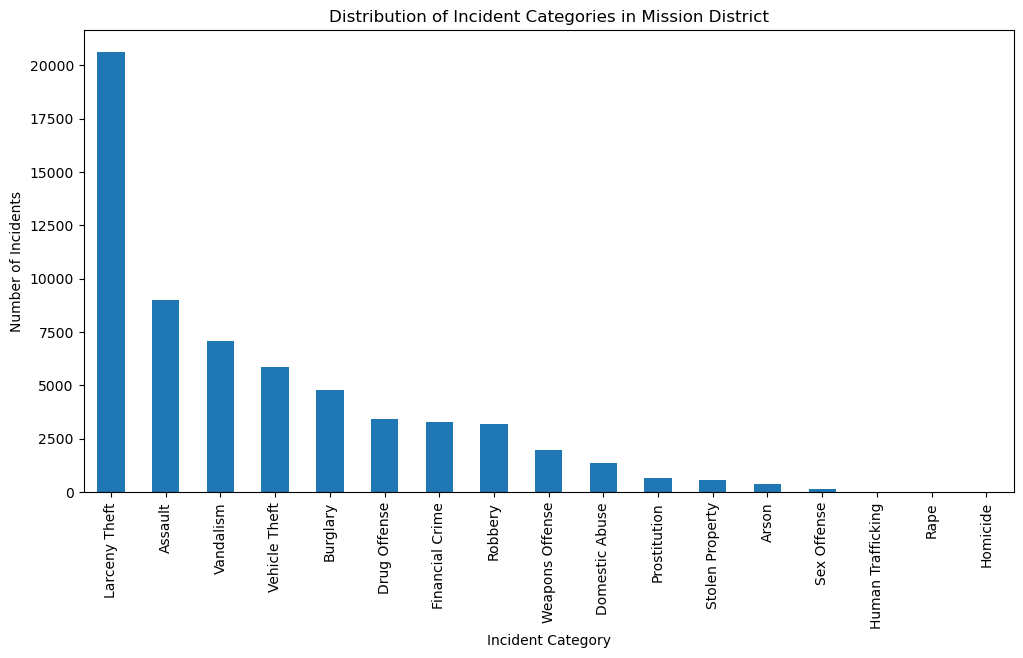

In [64]:
## We see that the most affected neighborhoods are the Mission District, Tenderloin, South of Market (SoMa), and the Financial District. These are all neighborhoods which are concentrated
## in the downtown area. We can show this better later in tableau

## Now lets look at each of the top three most affected neighborhoods and see if we can identify any specific crime trends or patterns within them.

## First lets look at crime frequency counts in the mission district

plt.figure(figsize=(12,6))
df[df['Neighborhood'] == 'Mission']['Incident Category'].value_counts().plot(kind='bar')
plt.title('Distribution of Incident Categories in Mission District')
plt.xlabel('Incident Category')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=90)
plt.show()

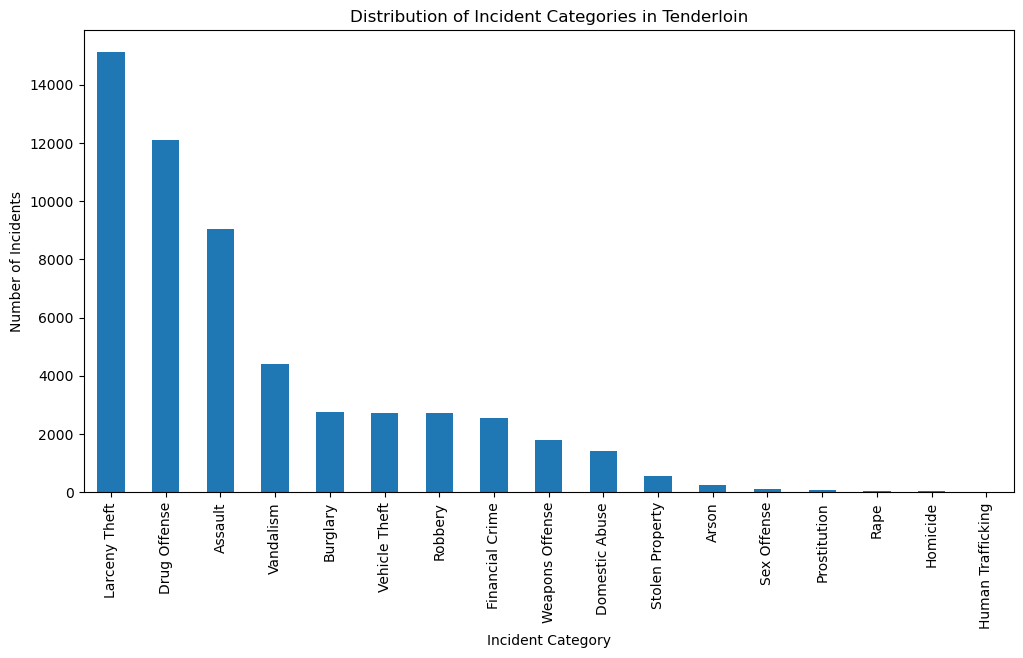

In [65]:
## Again we see that larceny theft is the most common type of crime in the mission district, with assault being the second most reported crime.

## Let's next look at the Tenderloin Neighborhood

plt.figure(figsize=(12,6))
df[df['Neighborhood'] == 'Tenderloin']['Incident Category'].value_counts().plot(kind='bar')
plt.title('Distribution of Incident Categories in Tenderloin')
plt.xlabel('Incident Category')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=90)
plt.show()

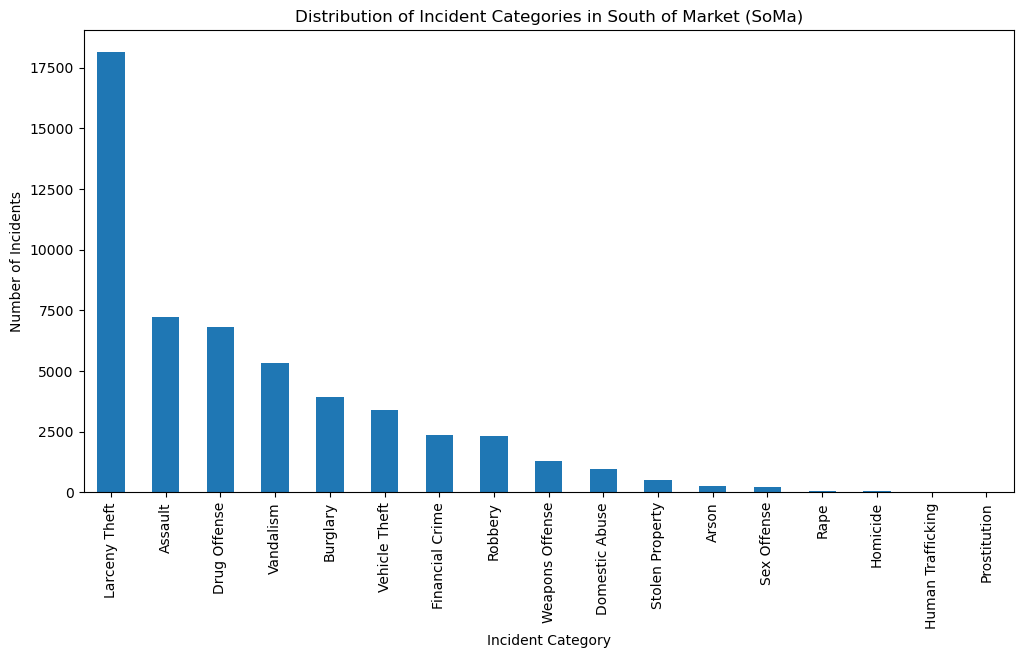

In [66]:
## No surprise at this point, larceny theft is the most common, but now we see that drug offenses are also quite prevalent in the Tenderloin neighborhood, as well as assaults.
## Now this can be due to the high number of homeless individuals in the Tenderloin, many of which are struggling with addiction and mental health issues.

## Lastly lets look at crime frequency counts in the South of Market (SoMa) neighborhood

plt.figure(figsize=(12,6))
df[df['Neighborhood'] == 'South of Market']['Incident Category'].value_counts().plot(kind='bar')
plt.title('Distribution of Incident Categories in South of Market (SoMa)')
plt.xlabel('Incident Category')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=90)
plt.show()


C:\Users\Ljsaa\AppData\Local\Temp\ipykernel_29664\274911701.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = assault_df.resample('M').size()


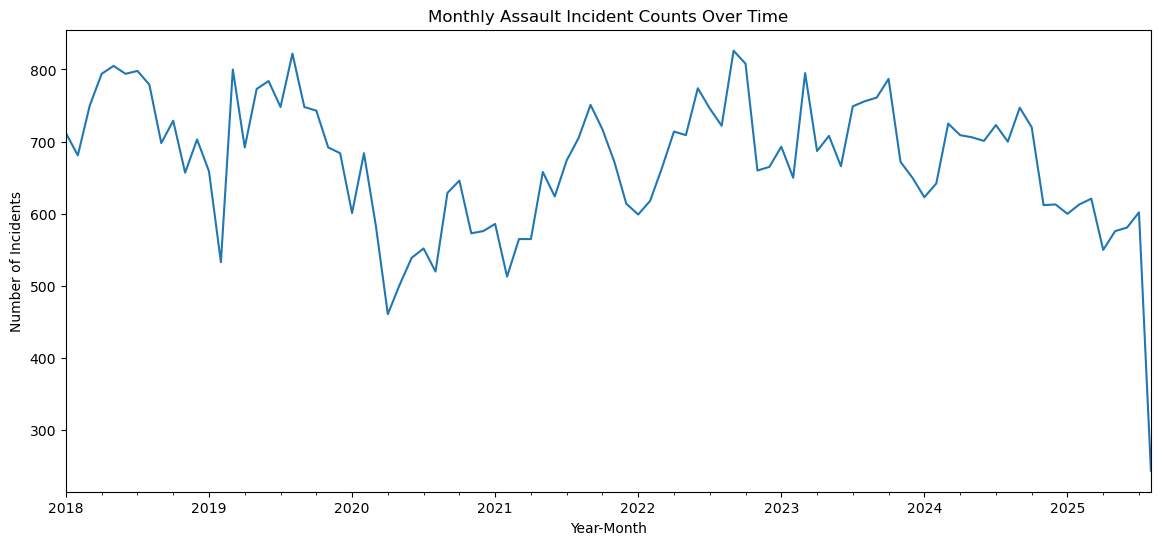

In [67]:
## Again the most common crime here was larceny theft, with a similar crime distribution to that of the mission district, though we also see a notable number of drug offenses.

## For extra lets see if we can identify any spikes is assault cases, first lets see the overall trend in assault cases throughtout the months

assault_df = df[df['Incident Category'] == 'Assault'].copy()
assault_df = assault_df.set_index('Incident Date')
monthly_counts = assault_df.resample('M').size()

monthly_counts.plot(kind='line', figsize=(14,6))
plt.title('Monthly Assault Incident Counts Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Incidents')
plt.show()


In [68]:
## While it is a little hard to notice, there does seem to be some spikes in assault cases in certain months in the year. Most notably from the graphs we see that assault cases begin to taper off 
## towards the end of the year, with spikes occuring at the beginning of the year and during the summer months.

'''
Lastly we can look at resolution rates, this dataset did include a resolution column which indicates whether a case was resolved or not. We can take this and come up with 
resolution rates by dividing the number of resolved cases by the total number of cases for each category. First we need to view the entries of this and convert them to a numeric format.
'''

df['Resolution'].unique()


array(['Open or Active', 'Cite or Arrest Adult', 'Exceptional Adult'],
      dtype=object)

In [69]:
## Exceptional Adult after some searching refer to cases where the case was resolved however with no conviction, we will calculate two values using the data, the first will be for strict conviction rates
## and the second will be for clearance rates which will include exceptional adult cases as well as convictions, basically cases which are no longer open to investigation and have been marked as resolved.

## Lets first look at strict conviction rates.

conviction_counts = df[df['Resolution'] == 'Cite or Arrest Adult'].groupby('Incident Category').size()
total_counts = df.groupby('Incident Category').size()
strict_conviction_rates = (conviction_counts / total_counts).fillna(0).sort_values(ascending=False)

strict_conviction_rates

Incident Category
Drug Offense         0.934447
Prostitution         0.864322
Stolen Property      0.822787
Homicide             0.649289
Weapons Offense      0.589992
Sex Offense          0.546125
Human Trafficking    0.366197
Domestic Abuse       0.311348
Assault              0.277410
Arson                0.208378
Robbery              0.183811
Burglary             0.117644
Vandalism            0.111651
Rape                 0.072874
Vehicle Theft        0.049563
Financial Crime      0.044548
Larceny Theft        0.041078
dtype: float64

In [70]:
## We see that Drug Offenses are the most likely to result in a conviction, followed by prostitution and Stolen Property. Homicide cases interstingly only have around a 64% conviction rate, 
## which to me is quite surprising given the severity of the crime. Among the least convicted are other property crimes such as Burglary and Theft, with larceny theft being the lowest crime to 
## result in a conviction, despite being the most common.

## Let's look at clearance rates to see if we can see any major differences is solved cases.

clearance_counts = df[df['Resolution'].isin(['Exceptional Adult', 'Cite or Arrest Adult'])].groupby('Incident Category').size()
total_counts = df.groupby('Incident Category').size()
clearance_rates = (clearance_counts / total_counts).fillna(0).sort_values(ascending=False)

clearance_rates


Incident Category
Drug Offense         0.934767
Prostitution         0.879397
Stolen Property      0.825100
Homicide             0.668246
Weapons Offense      0.590707
Sex Offense          0.551661
Human Trafficking    0.450704
Domestic Abuse       0.327316
Assault              0.280923
Arson                0.212675
Robbery              0.185880
Burglary             0.118217
Vandalism            0.112958
Rape                 0.076923
Financial Crime      0.058901
Vehicle Theft        0.049789
Larceny Theft        0.041419
dtype: float64

In [71]:
## In general we do not see much difference between the strict conviction rates and the clearance rates, indicating that the cases which are resolved are typically the ones which also result in a conviction.


In [73]:
''''
Conclusions:

After looking our EDA we can make some conclusions from this data. We see that in San Francisco, the most common crime is Larceny Theft, followed by Vandalism and Assault. 
Additionally, we observe that certain crime categories exhibit distinct temporal patterns, with most incidents occurring during daylight hours and fewer reports in the early morning. 
This suggests that the nature of the crime may be influenced by the time of day, potentially due to factors such as store hours and victim availability. Viewing monthly crime counts shows some
indications of seasonality, with crime in the summer and winter months being slightly higher, most likely due to increased outdoor activity during these times, from both tourists and locals. 
Neighborhood analysis shows that the Mission District, Tenderloin, and South of Market are among the most affected neighborhoods, all of which are most affected by Larceny Theft. 
Looking closer at the tenderloin district shows us that the second most common incident report is drug offenses and the third being assault, likely due to increased volume of homeless individuals who are struggling with 
addiction potentially making them more likely to also react irrationally and assault others.

'''

'''
Now that we finished our EDA in jupyter notebooks we can write our dataframe to a csv to be used in tableau to create a simple dashboard that shows our findings.
'''

df.to_csv('sf_crime_data_filtered.csv')